In [1]:
import pandas as pd
import numpy as np
import os

from rdkit import Chem

In [2]:
homedir = os.path.dirname(os.path.realpath('__file__'))
homedir = homedir+"/data/"
archdir = homedir+"/archive/"

In [3]:
from chem_scripts import cs_compute_features, cs_set_resolution, cs_coords_to_grid, cs_check_grid_boundary
from chem_scripts import cs_channel_mapping, cs_map_atom_to_grid, cs_map_bond_to_grid, cs_grid_to_image

d:\Users\Huang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
def gen_image():
    
    exclusion_list = []
    full_array_list = []

    for i in range(0,df.shape[0]):

        # Extract SMILES string
        smiles_string = df["smiles"][i]
        #print(i, smiles_string)

        # Extract ID of molecule
        id_string = df["id"][i]

        # Read SMILES string
        mol = Chem.MolFromSmiles(smiles_string)
        
        # Compute properties
        mol, df_atom, df_bond, nancheckflag = cs_compute_features(mol)
        
        # Intialize grid
        myarray = cs_set_resolution(gridsize, representation=rep)

        # Map coordinates to grid
        df_atom, atomcheckflag = cs_coords_to_grid(df_atom, dim, res)
        
        # Check if outside grid
        sizecheckflag = cs_check_grid_boundary(df_atom, gridsize)

        if sizecheckflag == True or atomcheckflag == True or nancheckflag == True:

            exclusion_list.append(id_string)
            print("EXCLUSION for "+str(id_string))

        else:

            # Initialize channels
            channel = cs_channel_mapping()

            # Map atom to grid
            myarray = cs_map_atom_to_grid(myarray, channel, df_atom, representation=rep)

            # Map bond to grid
            myarray = cs_map_bond_to_grid(myarray, channel, df_atom, df_bond, representation=rep)

            # Visualize status every 1000 steps
            if (i+1)%nskip==0:
                print("*** PROCESSING "+str(i+1)+": "+str(id_string)+" "+str(smiles_string))
                cs_grid_to_image(myarray, mol)

            # Generate combined array of raw input
            curr_array = myarray.flatten()
            curr_array_list = curr_array.tolist()
            full_array_list.append(curr_array_list)

    full_array = np.asarray(full_array_list)
    print(full_array.shape)
    print(exclusion_list)

    return(full_array, exclusion_list)

# Running image preparation

In [5]:
dim = 40       # Size of the box in Angstroms, not radius!
res = 0.5      # Resolution of each pixel
rep = "engA"    # Image representation used
nskip = 500    # How many steps till next visualization

gridsize = int(dim/res)

PROCESSING TASK: tox_niehs_int verytoxic
EXCLUSION for molid66
EXCLUSION for molid1967
EXCLUSION for molid3231
EXCLUSION for molid4741
*** PROCESSING 500: molid5357 Cc1cccc(C)c1NC(=O)CN1CCNCC1


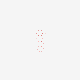

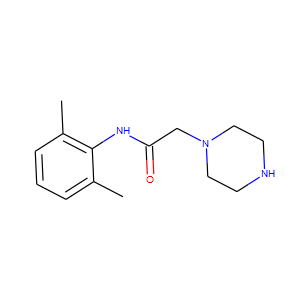

EXCLUSION for molid5421
EXCLUSION for molid6414
EXCLUSION for molid6466
EXCLUSION for molid8134
(820, 25600)
['molid66', 'molid1967', 'molid3231', 'molid4741', 'molid5421', 'molid6414', 'molid6466', 'molid8134']
*** Database Specs:
828 8 820
*** Separating Database:
(820, 25600)
(820,)
PROCESSING TASK: tox_niehs_int nontoxic
EXCLUSION for molid66
EXCLUSION for molid1967
EXCLUSION for molid3231
EXCLUSION for molid4741
*** PROCESSING 500: molid5357 Cc1cccc(C)c1NC(=O)CN1CCNCC1


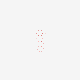

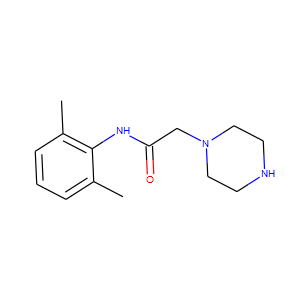

EXCLUSION for molid5421
EXCLUSION for molid6414
EXCLUSION for molid6466
EXCLUSION for molid8134
(820, 25600)
['molid66', 'molid1967', 'molid3231', 'molid4741', 'molid5421', 'molid6414', 'molid6466', 'molid8134']
*** Database Specs:
828 8 820
*** Separating Database:
(820, 25600)
(820,)
PROCESSING TASK: tox_niehs_int epa
EXCLUSION for molid66
EXCLUSION for molid1967
EXCLUSION for molid3231
EXCLUSION for molid4741
EXCLUSION for molid5421
*** PROCESSING 500: molid5449 CN(C)C=C1C(=O)N(c2ccccc2)N=C1c1ccccc1


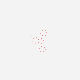

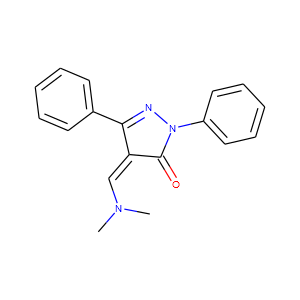

EXCLUSION for molid6414
EXCLUSION for molid6466
EXCLUSION for molid8134
(812, 25600)
['molid66', 'molid1967', 'molid3231', 'molid4741', 'molid5421', 'molid6414', 'molid6466', 'molid8134']
*** Database Specs:
820 8 812
*** Separating Database:
(812, 25600)
(812,)
PROCESSING TASK: tox_niehs_int ghs
EXCLUSION for molid66
EXCLUSION for molid1967
EXCLUSION for molid3231
EXCLUSION for molid4741
*** PROCESSING 500: molid5385 Cc1cc(C)nc(Nc2ccccc2)n1


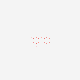

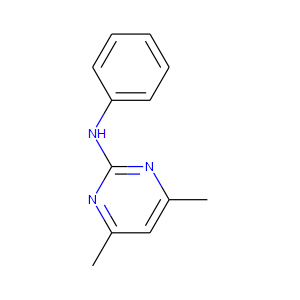

EXCLUSION for molid5421
EXCLUSION for molid6414
EXCLUSION for molid6466
EXCLUSION for molid8134
(818, 25600)
['molid66', 'molid1967', 'molid3231', 'molid4741', 'molid5421', 'molid6414', 'molid6466', 'molid8134']
*** Database Specs:
826 8 818
*** Separating Database:
(818, 25600)
(818,)
PROCESSING TASK: tox_niehs_int logld50
EXCLUSION for molid66
EXCLUSION for molid1967
EXCLUSION for molid5421
EXCLUSION for molid6466
*** PROCESSING 500: molid7032 CCSP(SCC)SCC


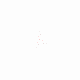

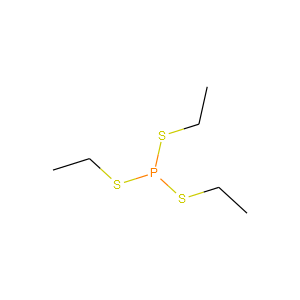

EXCLUSION for molid8134
(622, 25600)
['molid66', 'molid1967', 'molid5421', 'molid6466', 'molid8134']
*** Database Specs:
627 5 622
*** Separating Database:
(622, 25600)
(622,)


In [6]:
# Specify dataset name
jobname = "tox_niehs_int"
taskname = ["verytoxic", "nontoxic", "epa", "ghs", "logld50"]

for task in taskname:

    print("PROCESSING TASK: "+str(jobname)+" "+str(task))
    
    # Specify input and output csv
    filein  = homedir+jobname+"_"+task+".csv"
    fileout = homedir+jobname+"_"+task+"_image.csv"
    
    # Specify out npy files
    fileimage = archdir+jobname+"_"+task+"_img_"+rep+".npy" 
    filelabel = archdir+jobname+"_"+task+"_img_label.npy" 
    
    # Generate image
    df = pd.read_csv(filein)
    full_array, exclusion_list = gen_image()
    
    # Dataset statistics before and after image generation
    print("*** Database Specs:")
    print(df.shape[0], len(exclusion_list), int(df.shape[0])-int(len(exclusion_list)))
    
    # Create csv of final data (after exclusion)
    print("*** Separating Database:")
    mod_df = df[~df["id"].isin(exclusion_list)]
    mod_df.to_csv(fileout, index=False)

    # Save generated images as npy
    np.save(fileimage, full_array)
    print(full_array.shape)
    
    # Save labels as npy
    label_array = mod_df[task].as_matrix().astype("float32")
    np.save(filelabel, label_array)
    print(label_array.shape)

PROCESSING TASK: tox_niehs_tv verytoxic
EXCLUSION for molid1759
EXCLUSION for molid200
EXCLUSION for molid267
*** PROCESSING 500: molid298 CCOC(CN1CCN(CC(C)C(=O)c2ccccc2)CC1)c1ccccc1


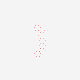

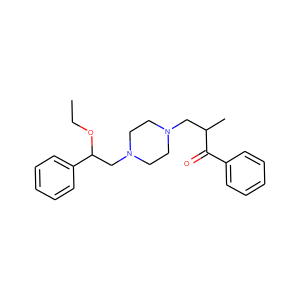

EXCLUSION for molid465
EXCLUSION for molid653
EXCLUSION for molid707
EXCLUSION for molid817
*** PROCESSING 1000: molid898 O=C1OC(=O)c2c(Cl)c(Cl)c(Cl)c(Cl)c21


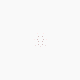

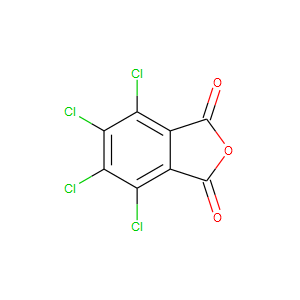

EXCLUSION for molid1068
EXCLUSION for molid1274
*** PROCESSING 1500: molid1527 c1cc2c(cc1C1CCCCC1)c1c3n2CCNC3CCC1


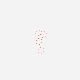

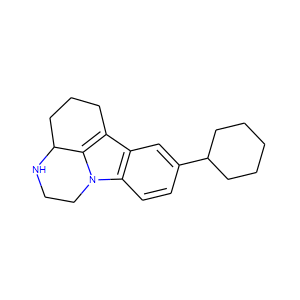

EXCLUSION for molid1676
EXCLUSION for molid1965
*** PROCESSING 2000: molid2159 C=CCN(CC=C)N=O


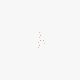

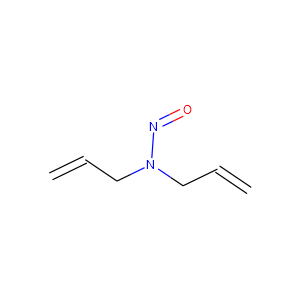

EXCLUSION for molid2256
EXCLUSION for molid2310
EXCLUSION for molid2566
*** PROCESSING 2500: molid2743 CCCCOC(=O)c1ccc(-n2nc(OCCN3CCCCC3)c3ccccc32)cc1


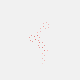

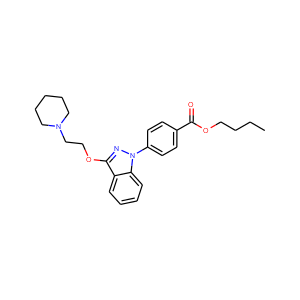

EXCLUSION for molid2907
EXCLUSION for molid3117
*** PROCESSING 3000: molid3350 N#CC(Cl)CCl


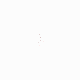

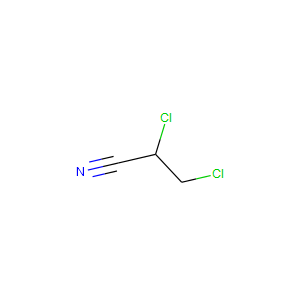

EXCLUSION for molid3375
EXCLUSION for molid3380
EXCLUSION for molid3389
EXCLUSION for molid3413
EXCLUSION for molid3462
EXCLUSION for molid3559
EXCLUSION for molid3770
EXCLUSION for molid3895
EXCLUSION for molid3945
*** PROCESSING 3500: molid3979 CNC(=O)Oc1ccccc1C1CCCC1


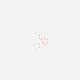

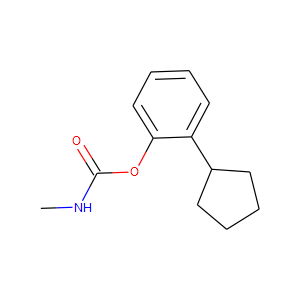

EXCLUSION for molid4136
EXCLUSION for molid4139
EXCLUSION for molid4479
EXCLUSION for molid4481
EXCLUSION for molid4607
*** PROCESSING 4000: molid4609 CCc1cc2c(s1)-n1c(C)nnc1CN=C2c1ccccc1Cl


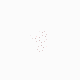

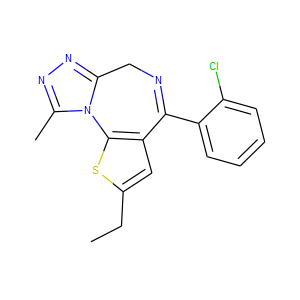

EXCLUSION for molid4712
EXCLUSION for molid4886
EXCLUSION for molid4897
*** PROCESSING 4500: molid5241 CC1=CCC2CC(CC3(CCC(C)C(C)O3)O2)OC(=O)C2C=C(C)C(O)C3OCC(=CC=CC(C)C1)C23O


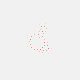

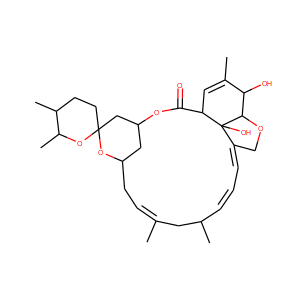

EXCLUSION for molid5370
EXCLUSION for molid5386
EXCLUSION for molid5419
*** PROCESSING 5000: molid5861 Cc1ccc2c(c1)c(-c1ccccc1)nn2CCCN(C)C


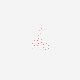

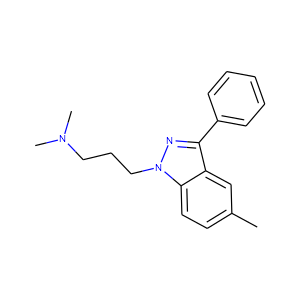

EXCLUSION for molid6064
EXCLUSION for molid6365
EXCLUSION for molid6425
EXCLUSION for molid6470
*** PROCESSING 5500: molid6478 CC(=O)SCC(=O)N=c1[nH]c2ccccc2s1


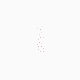

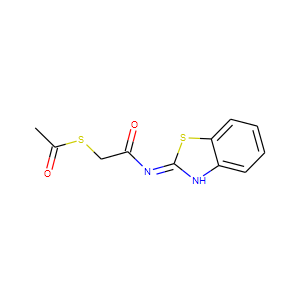

EXCLUSION for molid6560
EXCLUSION for molid6912
EXCLUSION for molid7004
*** PROCESSING 6000: molid7087 Cc1ccnc(N)c1


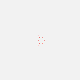

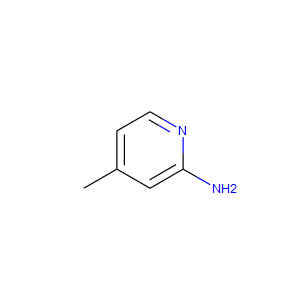

EXCLUSION for molid7309
EXCLUSION for molid7459
EXCLUSION for molid7570
EXCLUSION for molid7586
*** PROCESSING 6500: molid7706 CC=C(C)C(=O)OCC=C(C)CCC=C(C)C


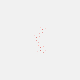

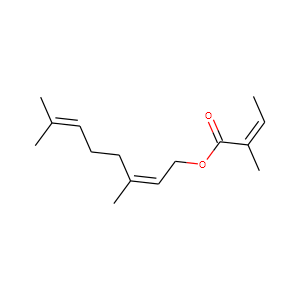

EXCLUSION for molid7709
EXCLUSION for molid8009
EXCLUSION for molid8160
*** PROCESSING 7000: molid8306 O=[N+]([O-])c1ccc(OP(=O)(CCl)c2ccccc2)cc1


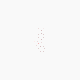

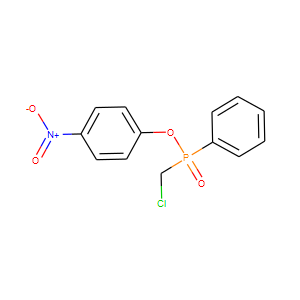

EXCLUSION for molid8460
EXCLUSION for molid8610
EXCLUSION for molid8769
*** PROCESSING 7500: molid8931 C[N+](C)(C)CCOP(=O)(O)OP(=O)(O)OCC1OC(n2ccc(N)nc2=O)C(O)C1O


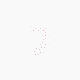

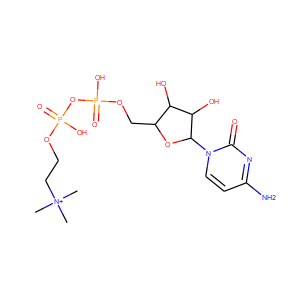

EXCLUSION for molid8967
(7496, 25600)
['molid1759', 'molid200', 'molid267', 'molid465', 'molid653', 'molid707', 'molid817', 'molid1068', 'molid1274', 'molid1676', 'molid1965', 'molid2256', 'molid2310', 'molid2566', 'molid2907', 'molid3117', 'molid3375', 'molid3380', 'molid3389', 'molid3413', 'molid3462', 'molid3559', 'molid3770', 'molid3895', 'molid3945', 'molid4136', 'molid4139', 'molid4479', 'molid4481', 'molid4607', 'molid4712', 'molid4886', 'molid4897', 'molid5370', 'molid5386', 'molid5419', 'molid6064', 'molid6365', 'molid6425', 'molid6470', 'molid6560', 'molid6912', 'molid7004', 'molid7309', 'molid7459', 'molid7570', 'molid7586', 'molid7709', 'molid8009', 'molid8160', 'molid8460', 'molid8610', 'molid8769', 'molid8967']
*** Database Specs:
7550 54 7496
*** Separating Database:
(7496, 25600)
(7496,)
PROCESSING TASK: tox_niehs_tv nontoxic
EXCLUSION for molid1759
EXCLUSION for molid200
EXCLUSION for molid267
*** PROCESSING 500: molid298 CCOC(CN1CCN(CC(C)C(=O)c2ccccc2)CC1)c1ccccc1


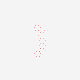

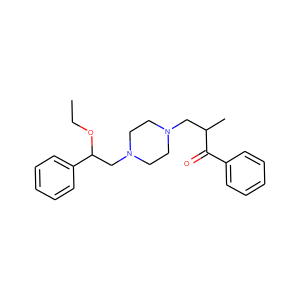

EXCLUSION for molid465
EXCLUSION for molid653
EXCLUSION for molid707
EXCLUSION for molid817
*** PROCESSING 1000: molid898 O=C1OC(=O)c2c(Cl)c(Cl)c(Cl)c(Cl)c21


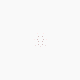

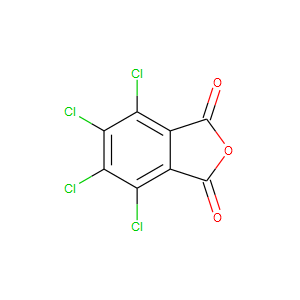

EXCLUSION for molid1068
EXCLUSION for molid1274
*** PROCESSING 1500: molid1527 c1cc2c(cc1C1CCCCC1)c1c3n2CCNC3CCC1


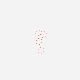

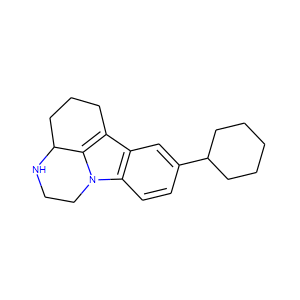

EXCLUSION for molid1676
EXCLUSION for molid1965
*** PROCESSING 2000: molid2160 CN1CCN(N=O)CC1


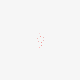

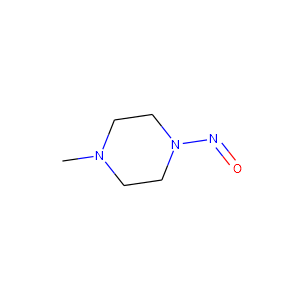

EXCLUSION for molid2256
EXCLUSION for molid2310
EXCLUSION for molid2566
*** PROCESSING 2500: molid2744 CCCCOC(=O)c1ccc(-n2nc(OCCCN3CCCCC3)c3ccccc32)cc1


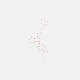

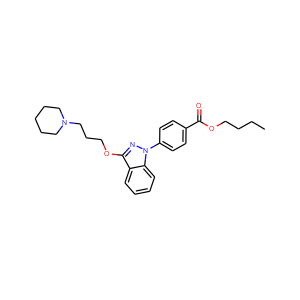

EXCLUSION for molid2907
EXCLUSION for molid3117
*** PROCESSING 3000: molid3352 CCO[Si](CCCOCC1CO1)(OCC)OCC


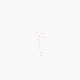

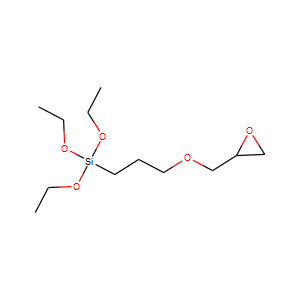

EXCLUSION for molid3375
EXCLUSION for molid3380
EXCLUSION for molid3389
EXCLUSION for molid3413
EXCLUSION for molid3462
EXCLUSION for molid3559
EXCLUSION for molid3770
EXCLUSION for molid3895
EXCLUSION for molid3945
*** PROCESSING 3500: molid3984 COc1cc(Oc2ccc(Cl)cc2Cl)ccc1[N+](=O)[O-]


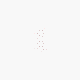

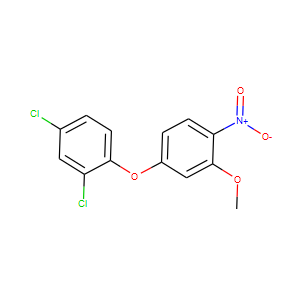

EXCLUSION for molid4136
EXCLUSION for molid4139
EXCLUSION for molid4481
EXCLUSION for molid4607
*** PROCESSING 4000: molid4617 Clc1cc2c(cc1Cl)Oc1c(cc(Cl)c(Cl)c1Cl)O2


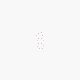

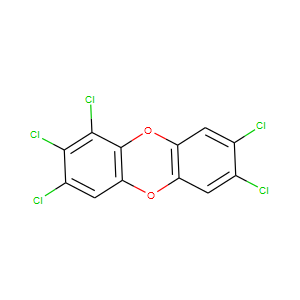

EXCLUSION for molid4712
EXCLUSION for molid4886
EXCLUSION for molid4897
*** PROCESSING 4500: molid5249 N#Cc1cccc([N+](=O)[O-])c1C#N


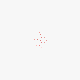

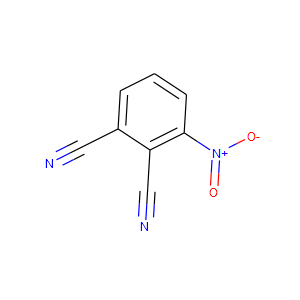

EXCLUSION for molid5370
EXCLUSION for molid5386
EXCLUSION for molid5419
*** PROCESSING 5000: molid5871 N#CCN(CC#N)CCN(CC#N)CC#N


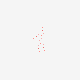

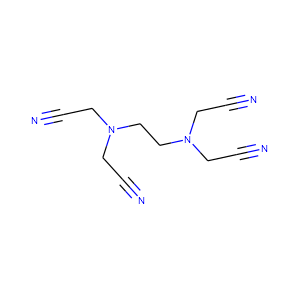

EXCLUSION for molid6064
EXCLUSION for molid6365
EXCLUSION for molid6425
EXCLUSION for molid6470
*** PROCESSING 5500: molid6487 N#CCON=C(C#N)c1ccccc1


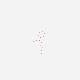

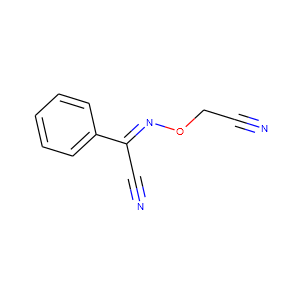

EXCLUSION for molid6560
EXCLUSION for molid6912
EXCLUSION for molid7004
*** PROCESSING 6000: molid7096 COc1ccc(C)cc1NC(C)=O


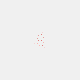

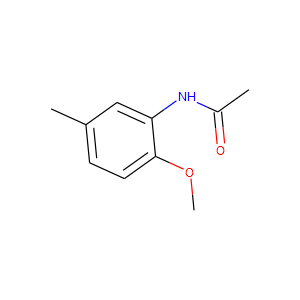

EXCLUSION for molid7309
EXCLUSION for molid7459
EXCLUSION for molid7570
EXCLUSION for molid7586
EXCLUSION for molid7709
*** PROCESSING 6500: molid7716 CCC(CC)COCCOC(=O)CCCCC(=O)OCCOCC(CC)CC


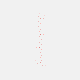

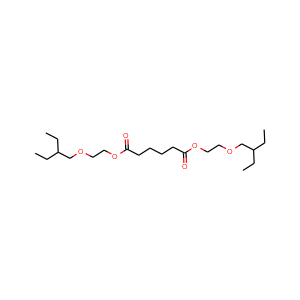

EXCLUSION for molid8009
EXCLUSION for molid8160
*** PROCESSING 7000: molid8318 FC(F)(F)C(=NOCC1OCCO1)c1ccc(Cl)cc1


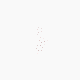

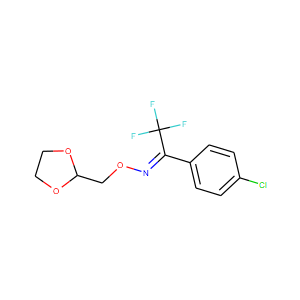

EXCLUSION for molid8460
EXCLUSION for molid8610
EXCLUSION for molid8769
*** PROCESSING 7500: molid8945 COc1ccc([N+](=O)[O-])cc1N


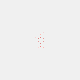

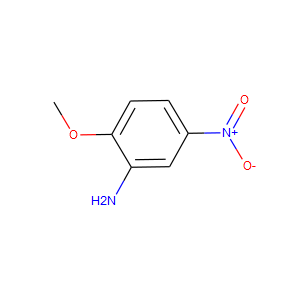

EXCLUSION for molid8967
(7486, 25600)
['molid1759', 'molid200', 'molid267', 'molid465', 'molid653', 'molid707', 'molid817', 'molid1068', 'molid1274', 'molid1676', 'molid1965', 'molid2256', 'molid2310', 'molid2566', 'molid2907', 'molid3117', 'molid3375', 'molid3380', 'molid3389', 'molid3413', 'molid3462', 'molid3559', 'molid3770', 'molid3895', 'molid3945', 'molid4136', 'molid4139', 'molid4481', 'molid4607', 'molid4712', 'molid4886', 'molid4897', 'molid5370', 'molid5386', 'molid5419', 'molid6064', 'molid6365', 'molid6425', 'molid6470', 'molid6560', 'molid6912', 'molid7004', 'molid7309', 'molid7459', 'molid7570', 'molid7586', 'molid7709', 'molid8009', 'molid8160', 'molid8460', 'molid8610', 'molid8769', 'molid8967']
*** Database Specs:
7539 53 7486
*** Separating Database:
(7486, 25600)
(7486,)
PROCESSING TASK: tox_niehs_tv epa
EXCLUSION for molid1759
EXCLUSION for molid200
EXCLUSION for molid267
*** PROCESSING 500: molid304 COC(=O)CC(C(C)=O)C(=O)OC


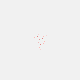

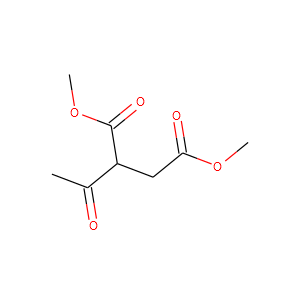

EXCLUSION for molid465
EXCLUSION for molid653
EXCLUSION for molid707
EXCLUSION for molid817
*** PROCESSING 1000: molid908 COCCOC(=O)c1ccccc1C(=O)OCCOC


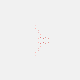

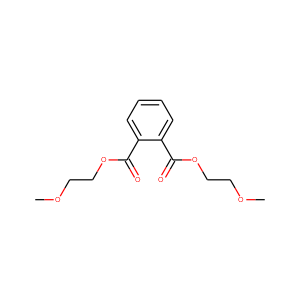

EXCLUSION for molid1068
EXCLUSION for molid1274
*** PROCESSING 1500: molid1543 Brc1c(Br)c(Br)c(-c2c(Br)c(Br)c(Br)c(Br)c2Br)c(Br)c1Br


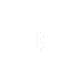

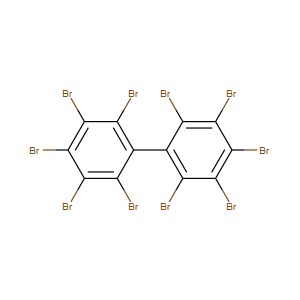

EXCLUSION for molid1676
EXCLUSION for molid1965
*** PROCESSING 2000: molid2184 C=CC(C)C(=O)OCC


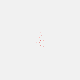

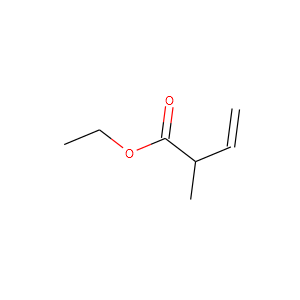

EXCLUSION for molid2256
EXCLUSION for molid2310
EXCLUSION for molid2566
*** PROCESSING 2500: molid2773 CCCCCOC(CBr)c1ccc(C(C)C)cc1


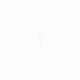

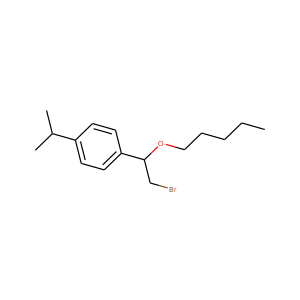

EXCLUSION for molid2907
EXCLUSION for molid3117
EXCLUSION for molid3375
EXCLUSION for molid3380
EXCLUSION for molid3389
*** PROCESSING 3000: molid3394 CC(C)=C1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O


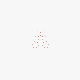

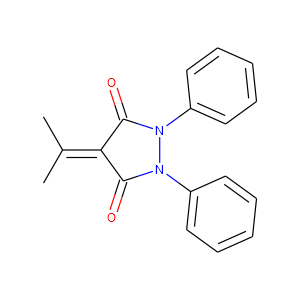

EXCLUSION for molid3462
EXCLUSION for molid3559
EXCLUSION for molid3770
EXCLUSION for molid3895
EXCLUSION for molid3945
*** PROCESSING 3500: molid4030 CCP(=O)(OC)Oc1ccc(Cl)cc1


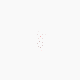

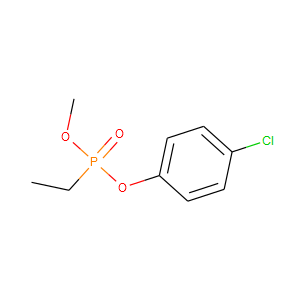

EXCLUSION for molid4136
EXCLUSION for molid4139
EXCLUSION for molid4481
EXCLUSION for molid4607
*** PROCESSING 4000: molid4662 Cc1ccc(S(=O)(=O)N=C=O)cc1


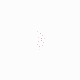

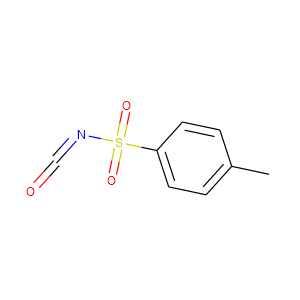

EXCLUSION for molid4712
EXCLUSION for molid4886
EXCLUSION for molid4897
*** PROCESSING 4500: molid5301 CCOP(=S)(OCC)Oc1cc(C)nc(N(C)C)n1


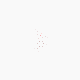

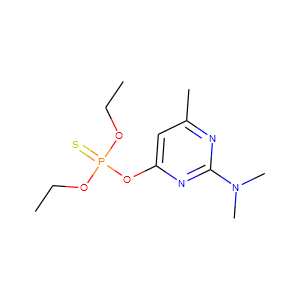

EXCLUSION for molid5370
EXCLUSION for molid5386
EXCLUSION for molid5419
*** PROCESSING 5000: molid5935 CCS(=O)CSP(=S)(OC(C)C)OC(C)C


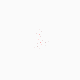

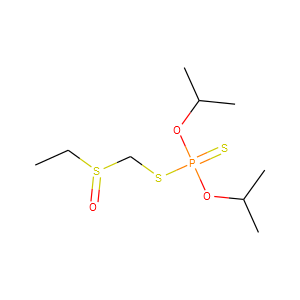

EXCLUSION for molid6064
EXCLUSION for molid6365
EXCLUSION for molid6425
EXCLUSION for molid6470
*** PROCESSING 5500: molid6550 CCCCCCCCCCCCCCCCCC#N


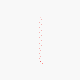

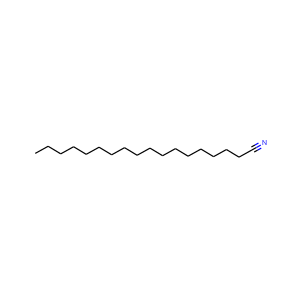

EXCLUSION for molid6560
EXCLUSION for molid6912
EXCLUSION for molid7004
*** PROCESSING 6000: molid7169 CCCCN(C)N=O


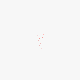

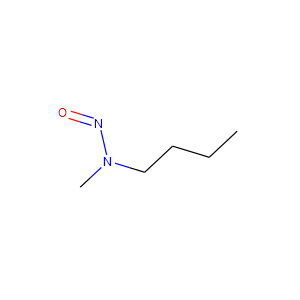

EXCLUSION for molid7309
EXCLUSION for molid7459
EXCLUSION for molid7570
EXCLUSION for molid7586
EXCLUSION for molid7709
*** PROCESSING 6500: molid7795 C=CC(N)=O


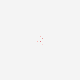

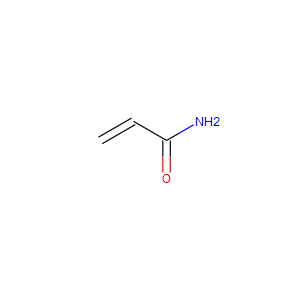

EXCLUSION for molid8009
EXCLUSION for molid8160
*** PROCESSING 7000: molid8403 Fc1c(Br)c(Br)c2nc(C(F)(F)F)[nH]c2c1Br


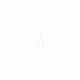

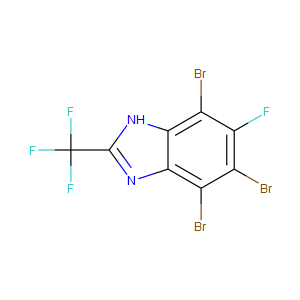

EXCLUSION for molid8460
EXCLUSION for molid8610
EXCLUSION for molid8769
EXCLUSION for molid8967
(7410, 25600)
['molid1759', 'molid200', 'molid267', 'molid465', 'molid653', 'molid707', 'molid817', 'molid1068', 'molid1274', 'molid1676', 'molid1965', 'molid2256', 'molid2310', 'molid2566', 'molid2907', 'molid3117', 'molid3375', 'molid3380', 'molid3389', 'molid3462', 'molid3559', 'molid3770', 'molid3895', 'molid3945', 'molid4136', 'molid4139', 'molid4481', 'molid4607', 'molid4712', 'molid4886', 'molid4897', 'molid5370', 'molid5386', 'molid5419', 'molid6064', 'molid6365', 'molid6425', 'molid6470', 'molid6560', 'molid6912', 'molid7004', 'molid7309', 'molid7459', 'molid7570', 'molid7586', 'molid7709', 'molid8009', 'molid8160', 'molid8460', 'molid8610', 'molid8769', 'molid8967']
*** Database Specs:
7462 52 7410
*** Separating Database:
(7410, 25600)
(7410,)
PROCESSING TASK: tox_niehs_tv ghs
EXCLUSION for molid1759
EXCLUSION for molid200
EXCLUSION for molid267
*** PROCESSING 500: molid298 CCOC(C

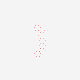

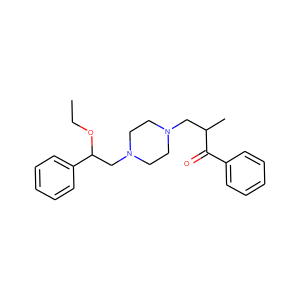

EXCLUSION for molid465
EXCLUSION for molid653
EXCLUSION for molid707
EXCLUSION for molid817
*** PROCESSING 1000: molid898 O=C1OC(=O)c2c(Cl)c(Cl)c(Cl)c(Cl)c21


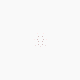

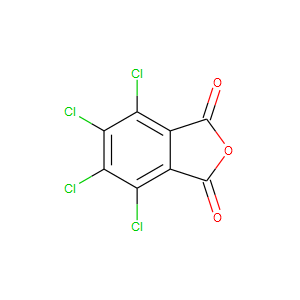

EXCLUSION for molid1068
EXCLUSION for molid1274
*** PROCESSING 1500: molid1527 c1cc2c(cc1C1CCCCC1)c1c3n2CCNC3CCC1


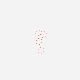

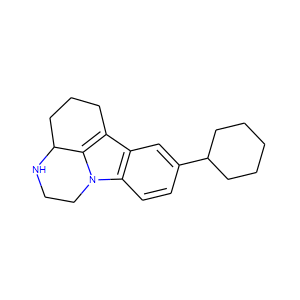

EXCLUSION for molid1676
EXCLUSION for molid1965
*** PROCESSING 2000: molid2160 CN1CCN(N=O)CC1


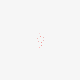

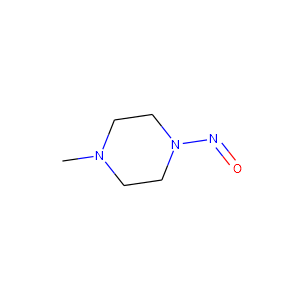

EXCLUSION for molid2256
EXCLUSION for molid2310
EXCLUSION for molid2566
*** PROCESSING 2500: molid2748 CCN1CCCC(Nc2cc(C)nc(N=C(N)Nc3ccc(Cl)c(Cl)c3)n2)C1


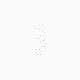

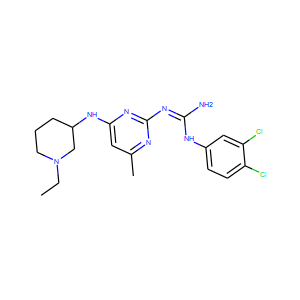

EXCLUSION for molid2907
EXCLUSION for molid3117
*** PROCESSING 3000: molid3360 Cc1ccsc1C=CC1=NCCCN1C


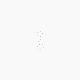

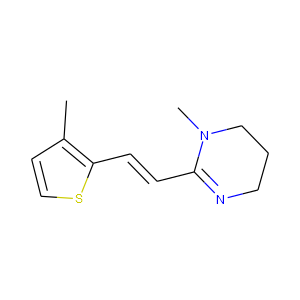

EXCLUSION for molid3375
EXCLUSION for molid3380
EXCLUSION for molid3389
EXCLUSION for molid3413
EXCLUSION for molid3462
EXCLUSION for molid3559
EXCLUSION for molid3770
EXCLUSION for molid3895
EXCLUSION for molid3945
*** PROCESSING 3500: molid3992 OCC(CO)(CBr)CBr


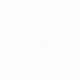

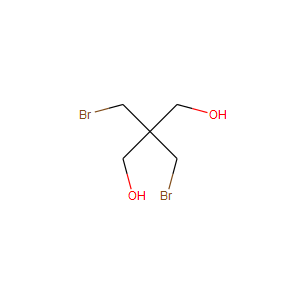

EXCLUSION for molid4136
EXCLUSION for molid4139
EXCLUSION for molid4481
EXCLUSION for molid4607
*** PROCESSING 4000: molid4626 O=C(CF)Nc1ccc(F)cc1


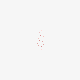

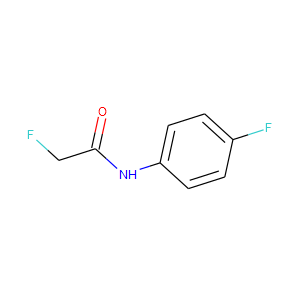

EXCLUSION for molid4712
EXCLUSION for molid4886
EXCLUSION for molid4897
*** PROCESSING 4500: molid5259 CCC1(CO)COCOC1


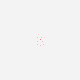

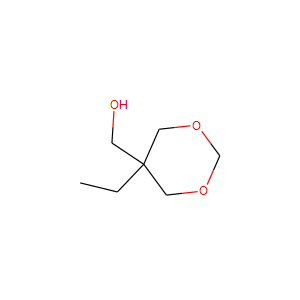

EXCLUSION for molid5370
EXCLUSION for molid5386
EXCLUSION for molid5419
*** PROCESSING 5000: molid5884 CC(=O)C1(O)Cc2c(O)c3c(c(O)c2C(OC2CC(N)C(O)C(C)O2)C1)C(=O)c1ccccc1C3=O


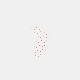

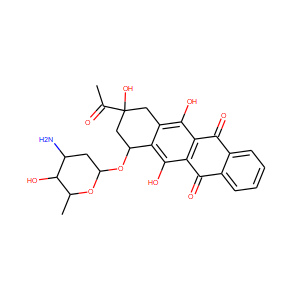

EXCLUSION for molid6064
EXCLUSION for molid6365
EXCLUSION for molid6425
EXCLUSION for molid6470
*** PROCESSING 5500: molid6500 Nc1c(Cl)cc(Cl)cc1Cl


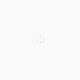

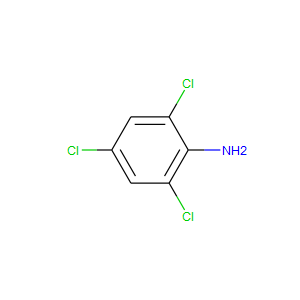

EXCLUSION for molid6560
EXCLUSION for molid6912
EXCLUSION for molid7004
*** PROCESSING 6000: molid7118 O=C(C(F)(F)F)C(F)(F)Cl


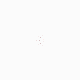

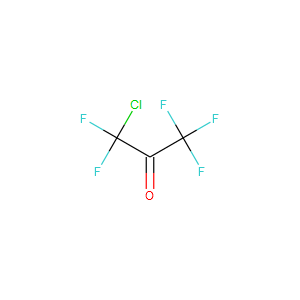

EXCLUSION for molid7309
EXCLUSION for molid7459
EXCLUSION for molid7570
EXCLUSION for molid7586
EXCLUSION for molid7709
*** PROCESSING 6500: molid7734 CC1=CC(=O)CC(C)(C)C1


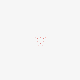

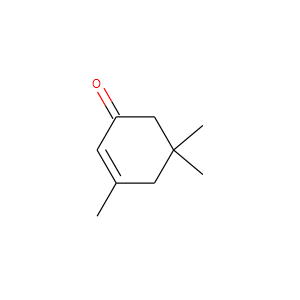

EXCLUSION for molid8009
EXCLUSION for molid8160
*** PROCESSING 7000: molid8336 NC(=O)Oc1ccccc1C(=O)Oc1ccc([N+](=O)[O-])cc1


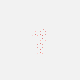

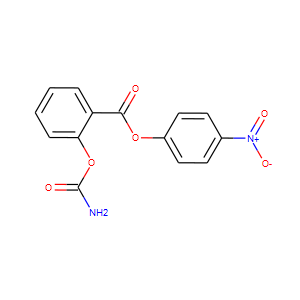

EXCLUSION for molid8460
EXCLUSION for molid8610
EXCLUSION for molid8769
EXCLUSION for molid8967
*** PROCESSING 7500: molid8968 O=[N+]([O-])c1ccc2c(c1)COP(=S)(N1CCOCC1)O2


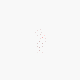

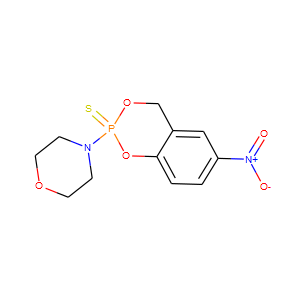

(7468, 25600)
['molid1759', 'molid200', 'molid267', 'molid465', 'molid653', 'molid707', 'molid817', 'molid1068', 'molid1274', 'molid1676', 'molid1965', 'molid2256', 'molid2310', 'molid2566', 'molid2907', 'molid3117', 'molid3375', 'molid3380', 'molid3389', 'molid3413', 'molid3462', 'molid3559', 'molid3770', 'molid3895', 'molid3945', 'molid4136', 'molid4139', 'molid4481', 'molid4607', 'molid4712', 'molid4886', 'molid4897', 'molid5370', 'molid5386', 'molid5419', 'molid6064', 'molid6365', 'molid6425', 'molid6470', 'molid6560', 'molid6912', 'molid7004', 'molid7309', 'molid7459', 'molid7570', 'molid7586', 'molid7709', 'molid8009', 'molid8160', 'molid8460', 'molid8610', 'molid8769', 'molid8967']
*** Database Specs:
7521 53 7468
*** Separating Database:
(7468, 25600)
(7468,)
PROCESSING TASK: tox_niehs_tv logld50
EXCLUSION for molid1759
EXCLUSION for molid200
EXCLUSION for molid267
EXCLUSION for molid465
*** PROCESSING 500: molid467 [SiH3]CCCCC(Cl)(Cl)Cl


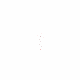

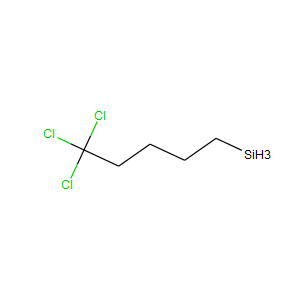

EXCLUSION for molid817
*** PROCESSING 1000: molid1361 C#CC(=O)C=CC


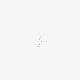

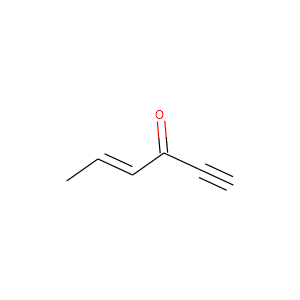

EXCLUSION for molid1965
*** PROCESSING 1500: molid2197 N#Cc1cc([N+](=O)[O-])ccc1Cl


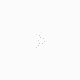

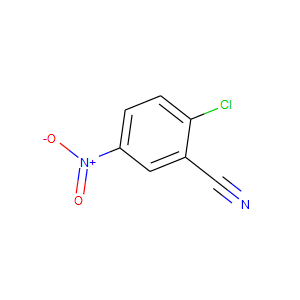

EXCLUSION for molid2310
*** PROCESSING 2000: molid2968 CCCC(C)c1cccc(OC(=O)NC)c1


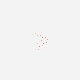

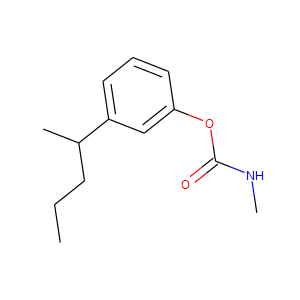

EXCLUSION for molid3559
*** PROCESSING 2500: molid3754 OC(O)C(Cl)(Cl)Cl


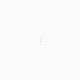

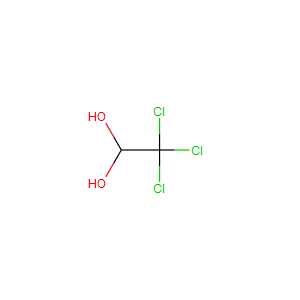

EXCLUSION for molid3895
EXCLUSION for molid3945
EXCLUSION for molid4139
*** PROCESSING 3000: molid4579 CP(=S)(OCCCCCl)Oc1ccc([N+](=O)[O-])c(C(F)(F)F)c1


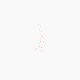

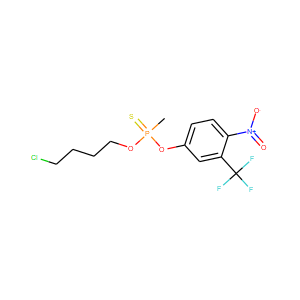

EXCLUSION for molid4607
EXCLUSION for molid4886
EXCLUSION for molid4897
*** PROCESSING 3500: molid5414 CC(CC(=O)O)CC(C)(C)C(=O)O


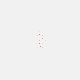

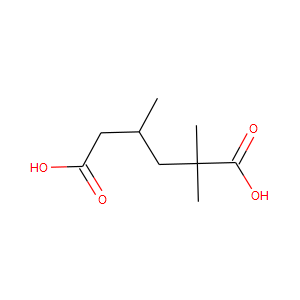

EXCLUSION for molid6064
*** PROCESSING 4000: molid6204 CCOc1ccc(C(=O)COC(=O)CCC(=O)O)c2ccccc12


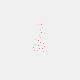

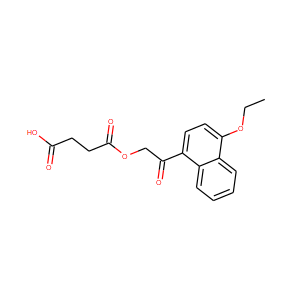

EXCLUSION for molid6425
EXCLUSION for molid6470
EXCLUSION for molid6560
EXCLUSION for molid6912
*** PROCESSING 4500: molid6992 CC(C)(C)NCC(O)CSc1nc(-c2ccc(C(N)=O)s2)cs1


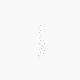

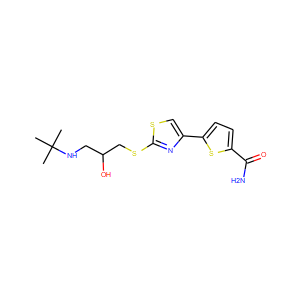

EXCLUSION for molid7570
EXCLUSION for molid7709
*** PROCESSING 5000: molid7908 Cc1cc(C)c2[nH]c(=O)sc2c1


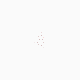

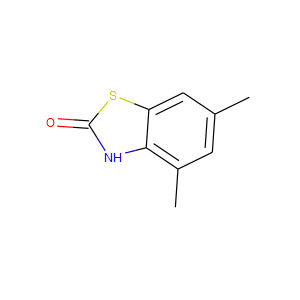

EXCLUSION for molid8009
EXCLUSION for molid8460
EXCLUSION for molid8610
*** PROCESSING 5500: molid8762 CCOc1ccccc1N1CCN(C(=O)CCC2CCCCC2)CC1


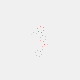

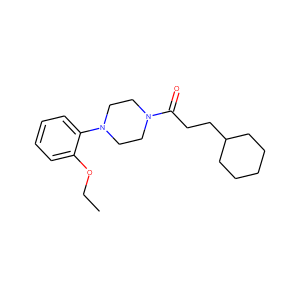

EXCLUSION for molid8769
(5581, 25600)
['molid1759', 'molid200', 'molid267', 'molid465', 'molid817', 'molid1965', 'molid2310', 'molid3559', 'molid3895', 'molid3945', 'molid4139', 'molid4607', 'molid4886', 'molid4897', 'molid6064', 'molid6425', 'molid6470', 'molid6560', 'molid6912', 'molid7570', 'molid7709', 'molid8009', 'molid8460', 'molid8610', 'molid8769']
*** Database Specs:
5606 25 5581
*** Separating Database:
(5581, 25600)
(5581,)


In [7]:
# Specify dataset name
jobname = "tox_niehs_tv"
taskname = ["verytoxic", "nontoxic", "epa", "ghs", "logld50"]

for task in taskname:

    print("PROCESSING TASK: "+str(jobname)+" "+str(task))
    
    # Specify input and output csv
    filein  = homedir+jobname+"_"+task+".csv"
    fileout = homedir+jobname+"_"+task+"_image.csv"
    
    # Specify out npy files
    fileimage = archdir+jobname+"_"+task+"_img_"+rep+".npy" 
    filelabel = archdir+jobname+"_"+task+"_img_label.npy" 
    
    # Generate image
    df = pd.read_csv(filein)
    full_array, exclusion_list = gen_image()
    
    # Dataset statistics before and after image generation
    print("*** Database Specs:")
    print(df.shape[0], len(exclusion_list), int(df.shape[0])-int(len(exclusion_list)))
    
    # Create csv of final data (after exclusion)
    print("*** Separating Database:")
    mod_df = df[~df["id"].isin(exclusion_list)]
    mod_df.to_csv(fileout, index=False)

    # Save generated images as npy
    np.save(fileimage, full_array)
    print(full_array.shape)
    
    # Save labels as npy
    label_array = mod_df[task].as_matrix().astype("float32")
    np.save(filelabel, label_array)
    print(label_array.shape)